In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline 


In [133]:
a = np.ones(10000)

In [134]:
data1 = np.random.normal(0.3, 0.1, 10000)
data2 = np.random.normal(0.7, 0.1, 10000)

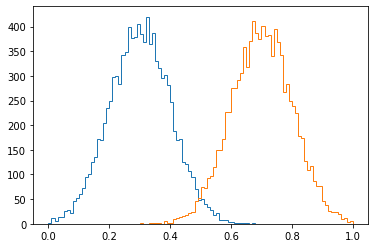

In [135]:
plt.hist(data1, bins = 100, range = (0,1),histtype='step');
plt.hist(data2, bins = 100, range = (0, 1), histtype = 'step');

In [136]:
x1 = data1 
x2 = data2 
y1 = a 
y2 = a*2
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

data = np.stack([x, y], axis = 1)

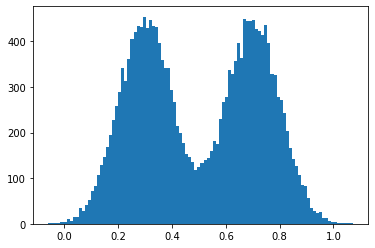

In [137]:
plt.hist(data[:,0], bins = 100);

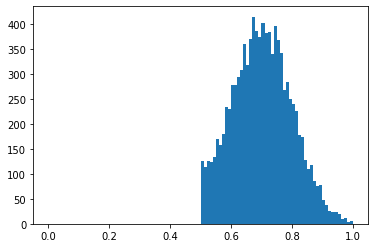

In [180]:
sel_data = data[data[:,0] > 0.5]
plt.hist(sel_data[:,0], bins = 100, range = (0, 1));

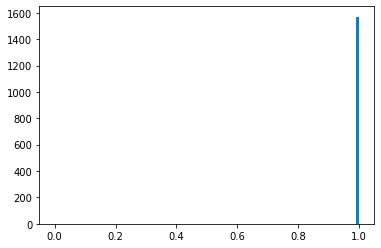

In [163]:
plt.hist(sel_data[:,1], bins = 100, range = (0, 1));

In [170]:
nSigTotal = len(data[data[:,1]==1])
nSigSelected = len(sel_data[sel_data[:,1]== 1])
print('Efficiency = ', nSigSelected / nSigTotal * 100, '%')

Efficiency =  15.7 %


In [174]:
nNoiseTotal = len(data[data[:,1]==1])
# negSelected = data[~(data[:,0] > 0.6) & (data[:,1] == 0)]
nNoiseSelected = nNoiseTotal - len(sel_data[sel_data[:,1]==2])

print('False Negative Rate : ', nNoiseSelected/nNoiseTotal * 100, '%')

False Negative Rate :  0.12 %


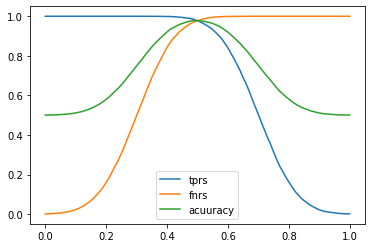

In [182]:
nSigTotal = len(data[data[:,1]==1])
nSigSelected = len(sel_data[sel_data[:,1]== 2])
nNoiseSelected = nNoiseTotal - len(sel_data[sel_data[:,1]==1])
ts, tprs, fnrs, accuracy = [], [], [], []
for t in np.linspace(0, 1, 101):
    nSigSelected = len(data[(data[:,1] == 2) & (data[:, 0] > t)])
    nNoiseNegSeleted = len(data[~(data[:,1]==2) & (data[:,0] <= t)])


    tpr = nSigSelected/nSigTotal
    fnr = nNoiseNegSeleted/nNoiseTotal 
    acc = (nSigSelected + nNoiseNegSeleted) / (nSigTotal + nNoiseTotal)

    ts.append(t)
    tprs.append(tpr)
    fnrs.append(fnr)
    accuracy.append(acc)

plt.plot(ts, tprs, label ='tprs')
plt.plot(ts, fnrs, label = 'fnrs')
plt.plot(ts, accuracy, label = 'acuuracy')
plt.legend()
plt.show()

